<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/GabrielDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()
gabrielDataset_Actual = pd.read_csv(io.BytesIO(uploaded['ByGabriel.csv']))

Saving ByGabriel.csv to ByGabriel.csv


In [ ]:
gabrielDataset_Actual_Copy = gabrielDataset_Actual.copy()

In [ ]:
print('Actual shape of dataset before any processing: ',gabrielDataset_Actual_Copy.shape)
actual_Rows = gabrielDataset_Actual_Copy.shape[0]
gabrielDataset_Actual_Copy = gabrielDataset_Actual_Copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',gabrielDataset_Actual_Copy.shape)
rows_AfterDeleting_Duplicates = gabrielDataset_Actual_Copy.shape[0]
print('No.of Duplicate rows in the Gabriel Dataset = ', (actual_Rows - rows_AfterDeleting_Duplicates))

Actual shape of dataset before any processing:  (253680, 22)
Shape of dataset after removing the duplicates:  (229781, 22)
No.of Duplicate rows in the Gabriel Dataset =  23899


In [ ]:
# @ Printing Sample Data
gabrielDataset_Actual_Copy.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
gabrielDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

In [ ]:
gabrielDataset_Actual_Copy.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
gabrielDataset_Actual_Copy.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

**If the number of unique values of a feature is < 20 then it is categorical feature else it is continous type variable**

Therefore from the above result we can conclude that the features BMI, MentalHealth, GenHealth are of continous type and rest all are of categorical type

In [ ]:
gabrielDataset_Actual_Copy.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

From the above we conclude that there are no missing values in the dataset

Text(0.5, 1.0, 'Frequency of people with pre-diabetes (1), diabetes(2) & no diabetes(0)')

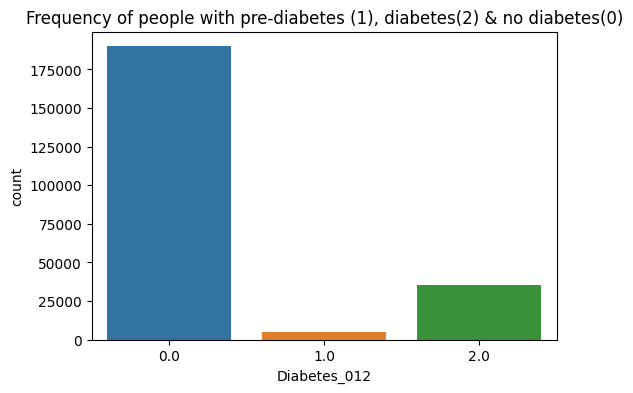

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='Diabetes_012')
plt.title('Frequency of people with pre-diabetes (1), diabetes(2) & no diabetes(0)')

# Distributions of Continous variables ['Age', 'BMI']

Text(0.5, 1.0, 'Distribution of Age')

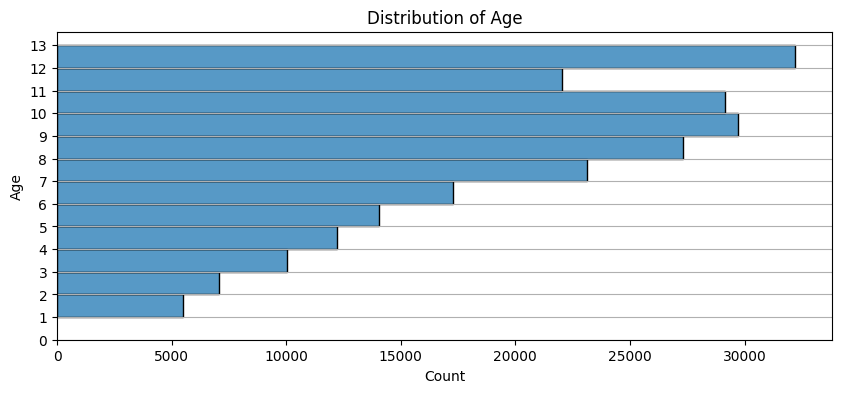

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=gabrielDataset_Actual_Copy, y='Age',binwidth=1,binrange=(1,13)).yaxis.grid(True)
plt.yticks(range(0,14))
plt.title('Distribution of Age')

From the above visual illustration we conclude that there is no age group of <18 in the dataset and most chunk of observations are of Age group between 7-13

Text(0.5, 1.0, 'Distribution of BMI')

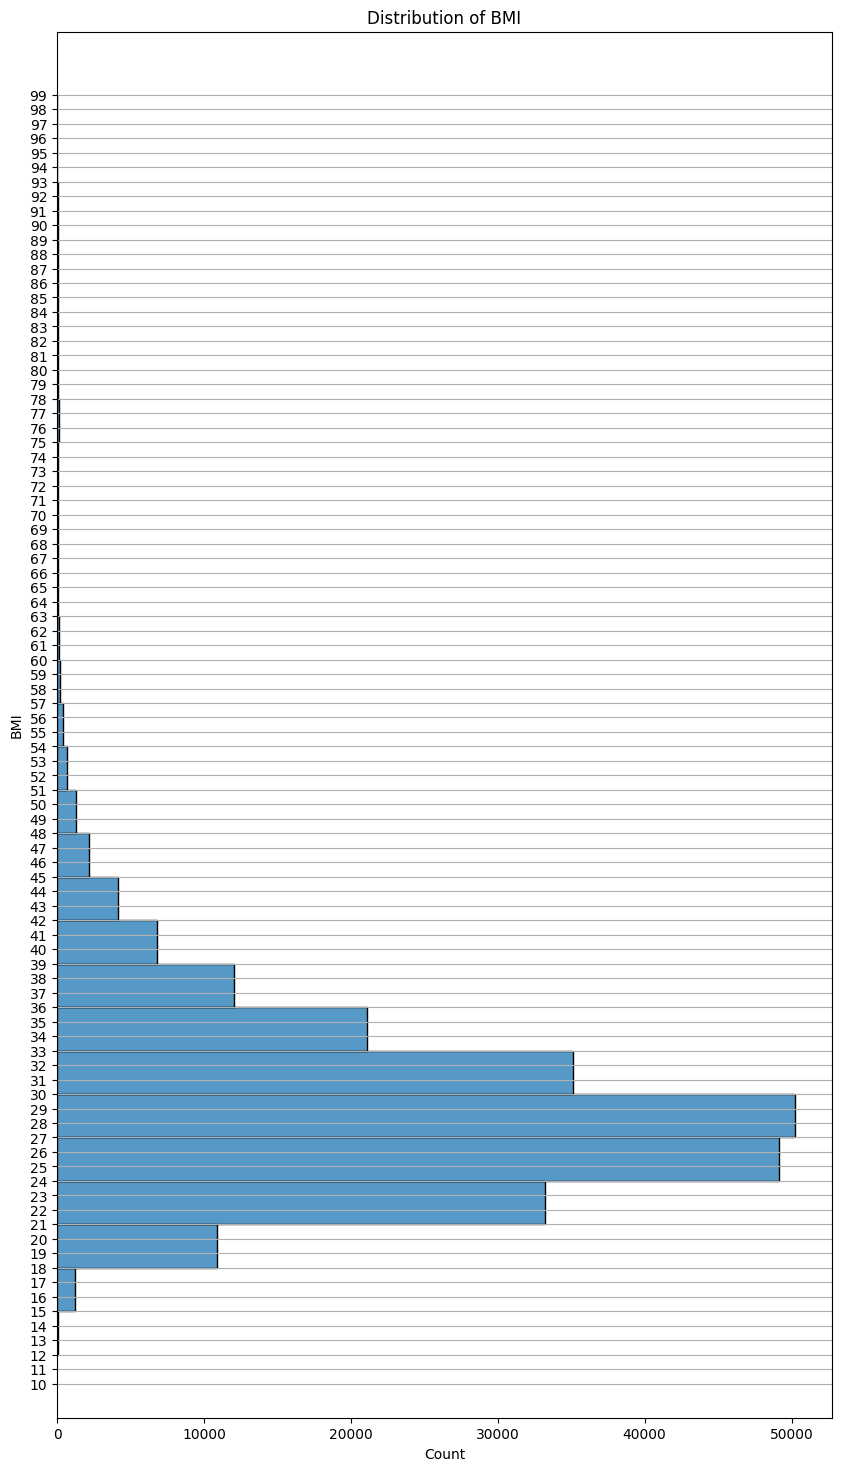

In [ ]:
plt.figure(figsize=(10,18))
sns.histplot(data=gabrielDataset_Actual_Copy, y='BMI',binwidth=3).yaxis.grid(True)
plt.yticks(range(10,100))
plt.title('Distribution of BMI')

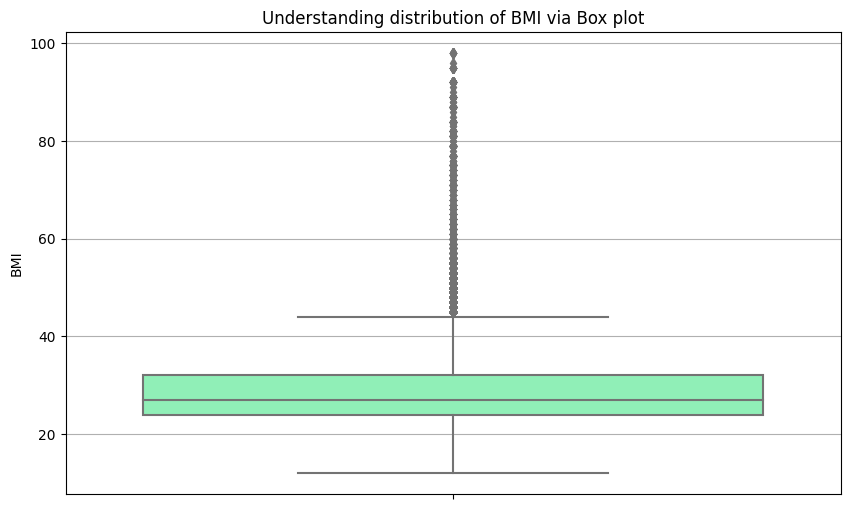

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=gabrielDataset_Actual_Copy,y='BMI',palette='rainbow').yaxis.grid(True)
plt.title('Understanding distribution of BMI via Box plot')
plt.show()

# Relations(Visual) between target feature Diabetes_012 and Continuous Variables['Age','BMI']

Text(0.5, 1.0, 'Diabetes Distribution by Age')

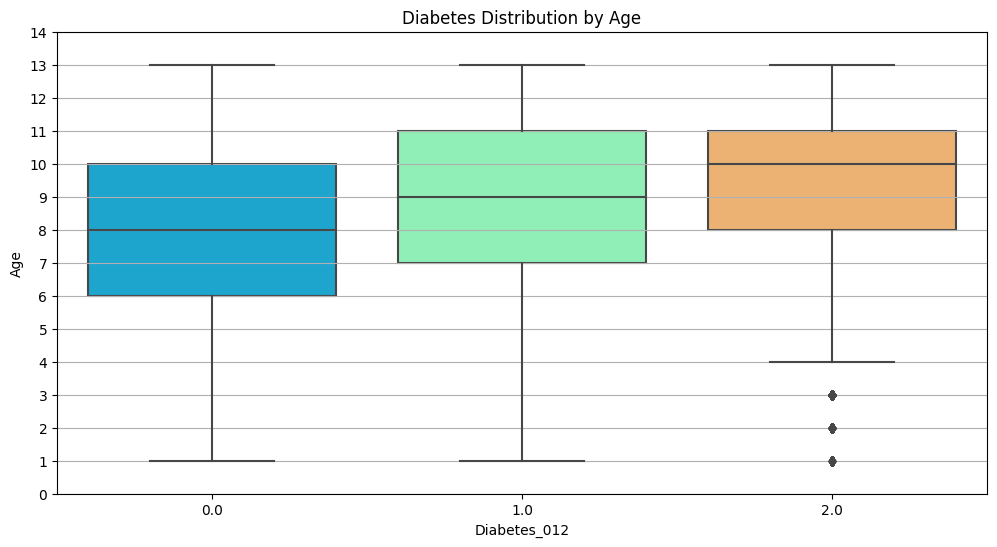

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Diabetes_012',y='Age',data=gabrielDataset_Actual_Copy,palette='rainbow').yaxis.grid(True)
plt.yticks(range(0,15))
plt.title('Diabetes Distribution by Age')

Text(0.5, 1.0, 'Diabetes Distribution by BMI')

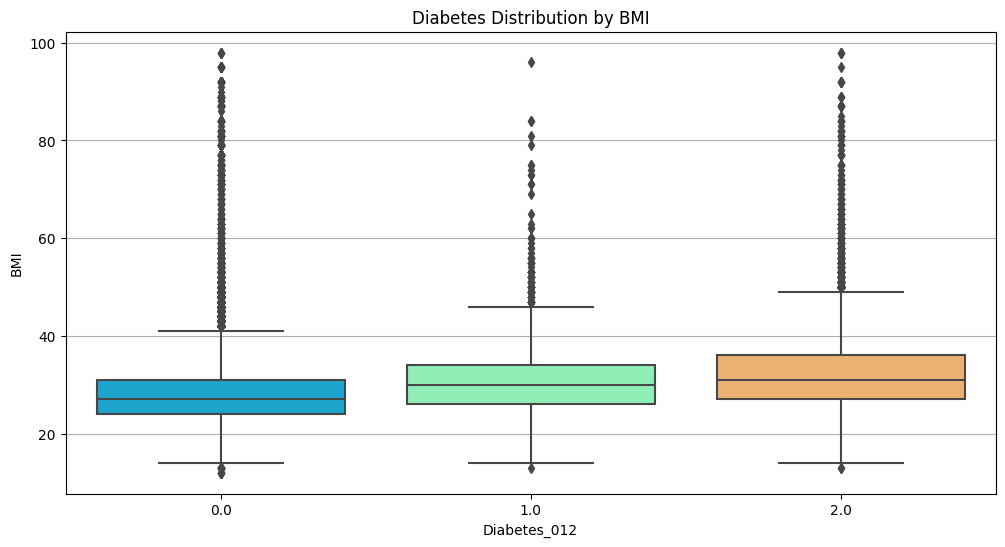

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Diabetes_012',y='BMI',data=gabrielDataset_Actual_Copy,palette='rainbow').yaxis.grid(True)
plt.title('Diabetes Distribution by BMI')

Text(0.5, 1.0, 'Diabetes Distribution by BMI & Age')

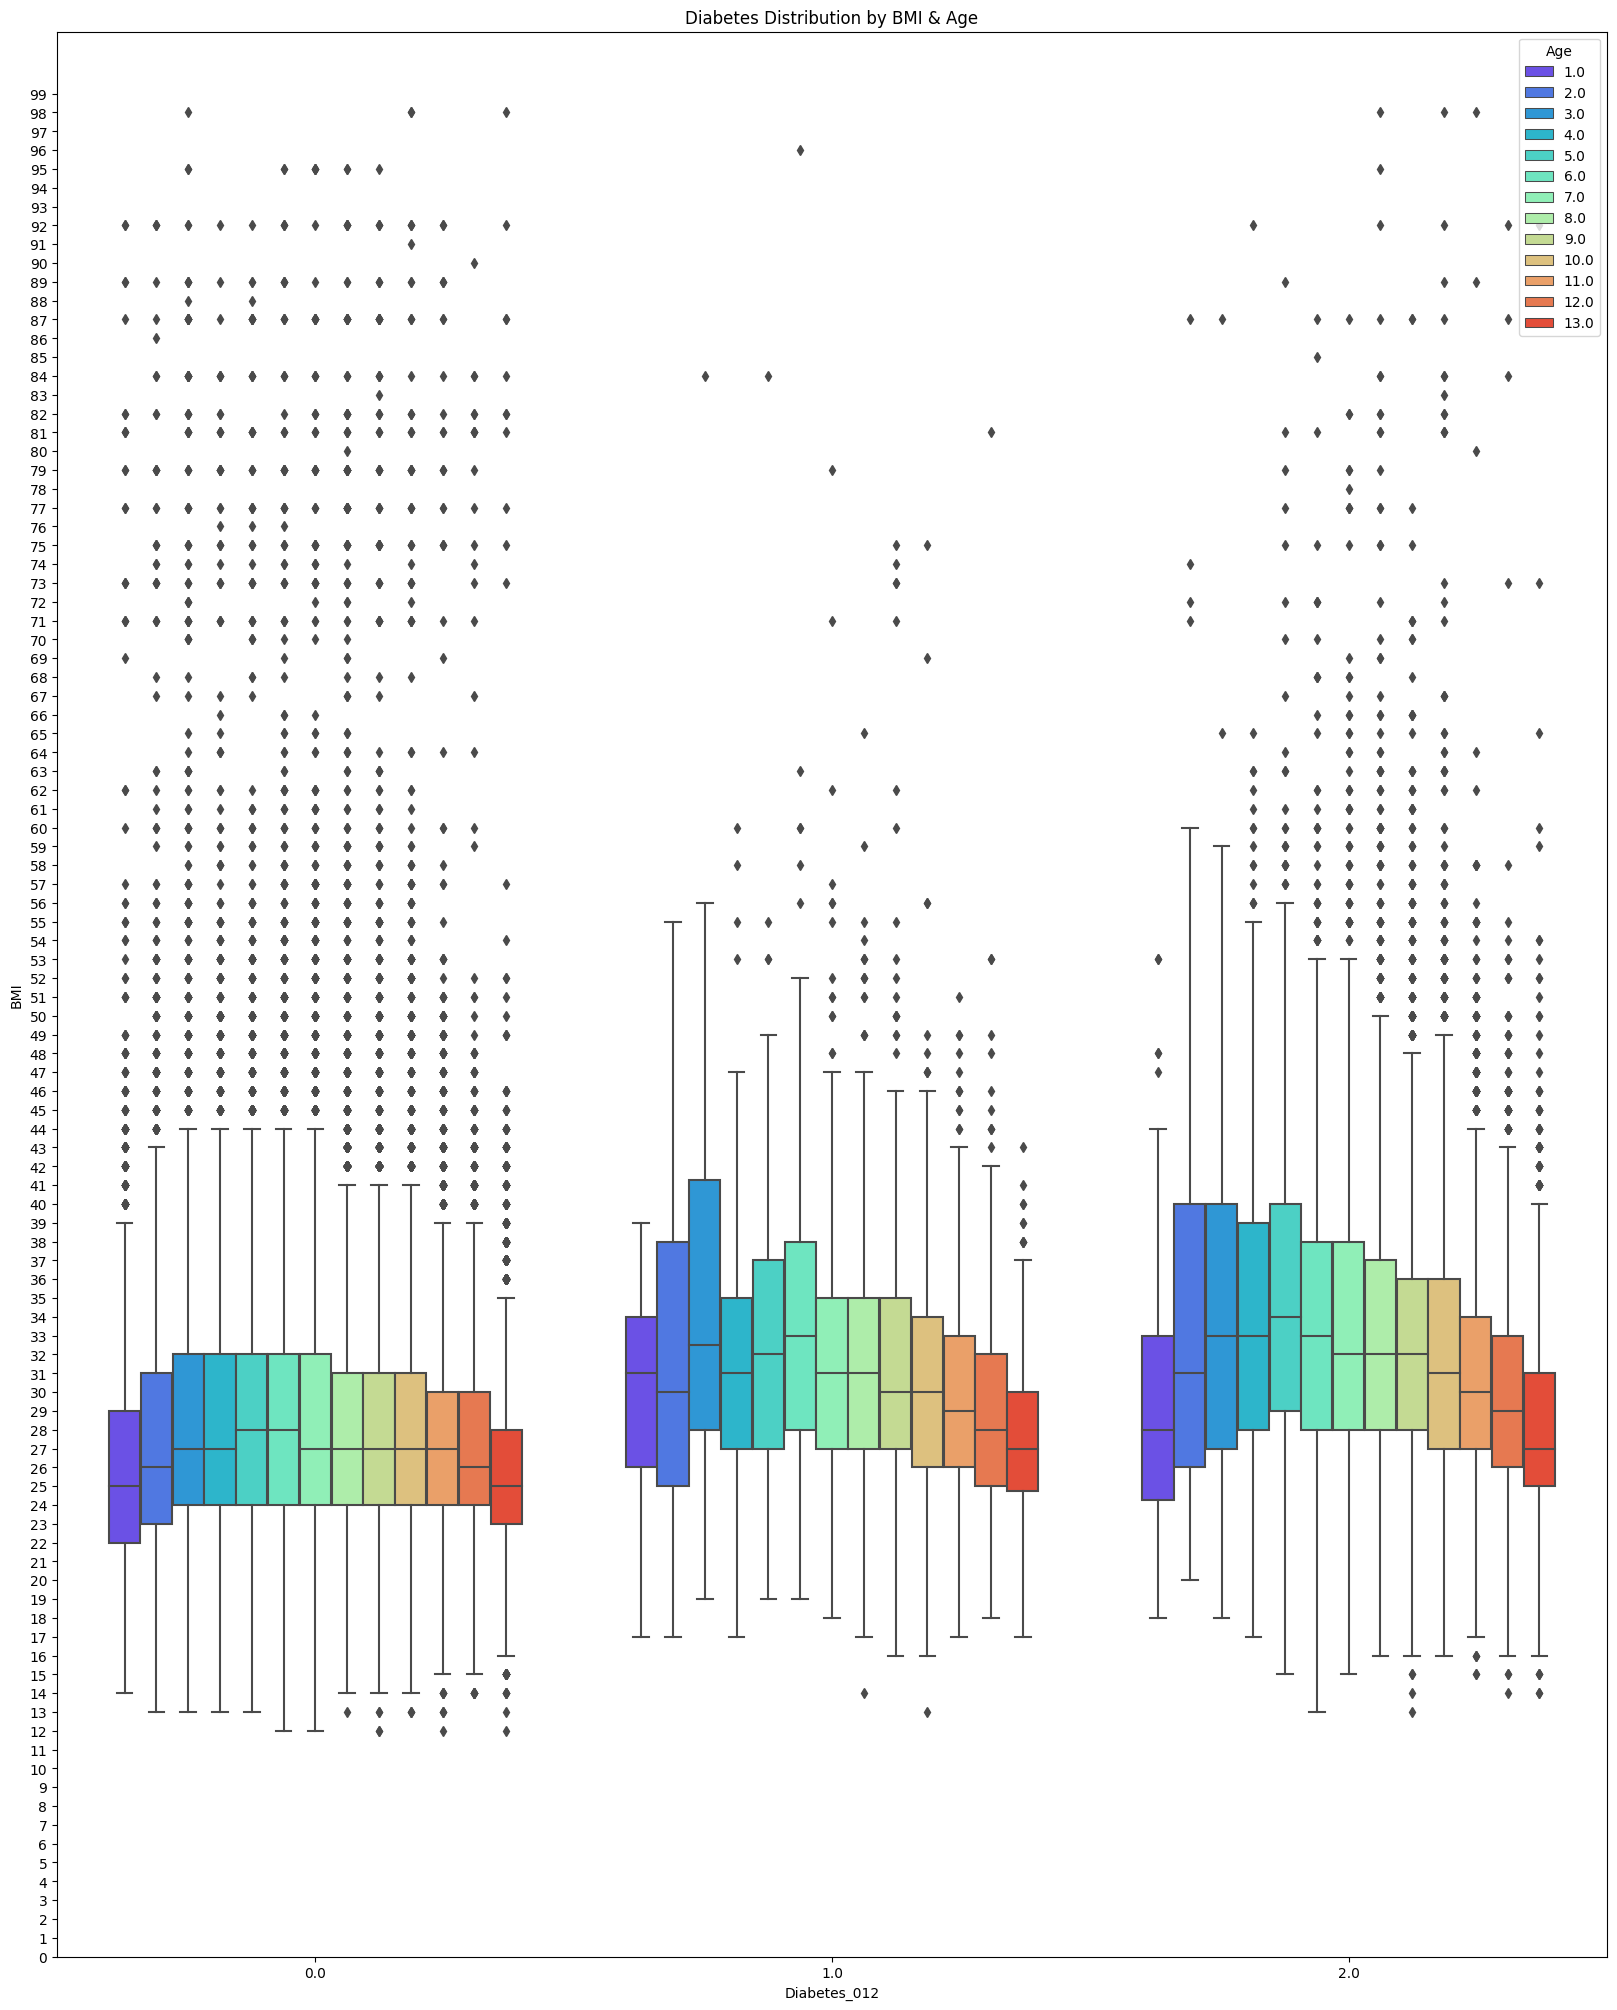

In [ ]:
plt.figure(figsize=(20,25))
sns.boxplot(x='Diabetes_012',y='BMI',data=gabrielDataset_Actual_Copy,palette='rainbow',hue='Age')
plt.yticks(range(0,100))
plt.title('Diabetes Distribution by BMI & Age')

# Understanding whether how much does continous variables like Age & BMI are influencing Diabetes through ANOVA Test(Statistical Test)

In [ ]:
def FunctionAnova(inputData, targetFeature, predictorVariables):
  selectedPredictors = []
  for predictor in predictorVariables:
    categoryGroupLists = inputData.groupby(targetFeature)[predictor].apply(list)
    anovaResults = f_oneway(*categoryGroupLists)
    if(anovaResults[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
  return selectedPredictors


In [ ]:
probablePredictorVariables = ['Age','BMI']
FunctionAnova(inputData=gabrielDataset_Actual_Copy, targetFeature='Diabetes_012', predictorVariables=probablePredictorVariables)

Age  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
BMI  is correlated with the target-variable  Diabetes_012  with p-value:  0.0


['Age', 'BMI']

# Distributions of Categorical Variables['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump']

Text(0.5, 1.0, 'Frequency of people who are Smoking in Dataset')

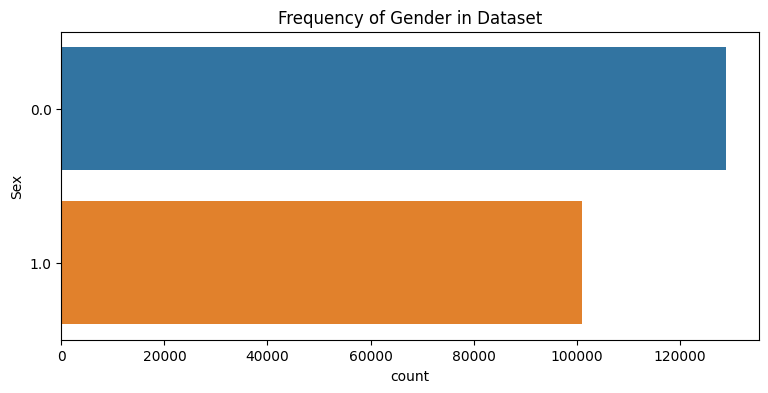

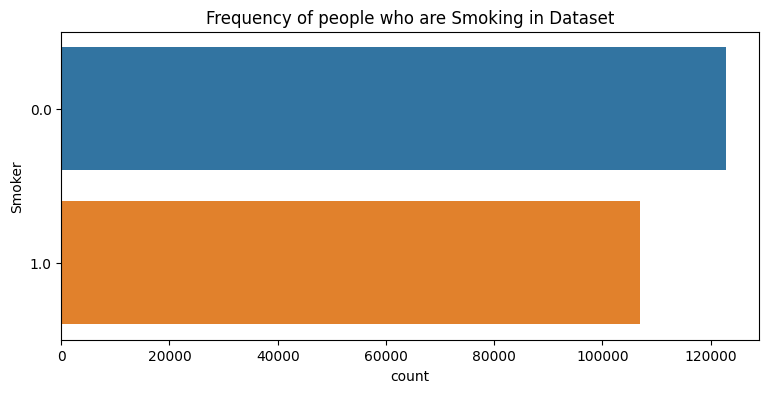

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(y='Sex',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of Gender in Dataset')

plt.figure(figsize=(9,4))
sns.countplot(y='Smoker',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of people who are Smoking in Dataset')

Text(0.5, 1.0, 'Frequency of High-BP people in Dataset')

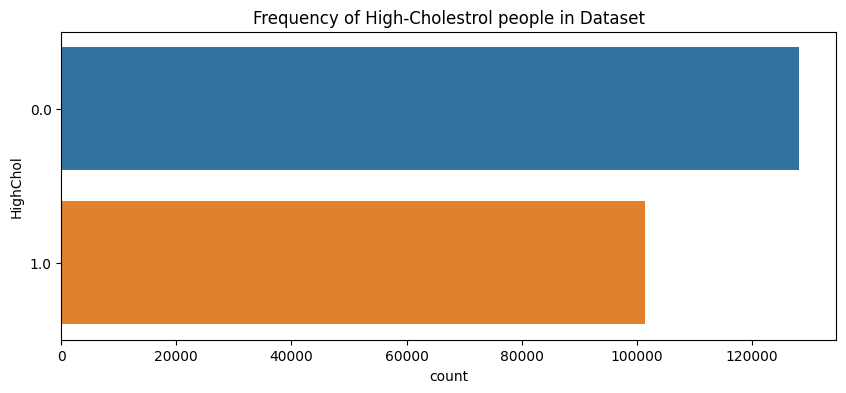

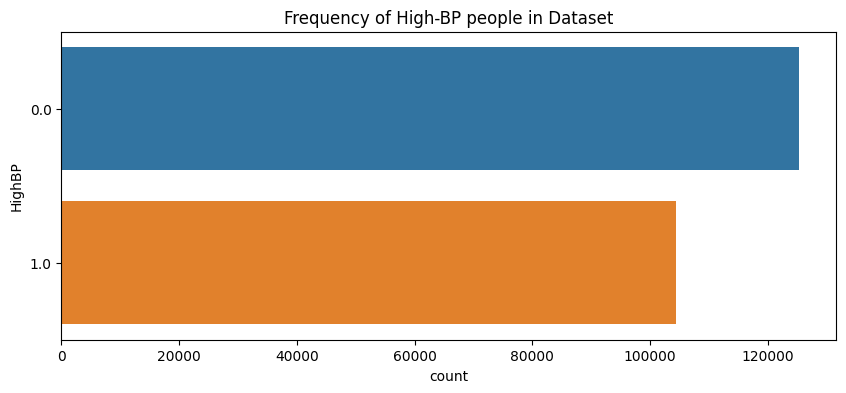

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(y='HighChol',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of High-Cholestrol people in Dataset')

plt.figure(figsize=(10,4))
sns.countplot(y='HighBP',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of High-BP people in Dataset')

Text(0.5, 1.0, 'Frequency of Heavy Alchohol Consumers in Dataset')

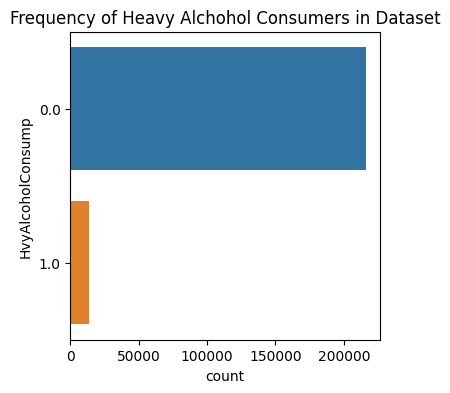

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=gabrielDataset_Actual_Copy,y='HvyAlcoholConsump')
plt.title('Frequency of Heavy Alchohol Consumers in Dataset')

# Relations(Visual) between target feature Diabetes_012 and Categorical variables['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump']

Text(0.5, 1.0, 'Variation Diabetes w.r.t Smokers')

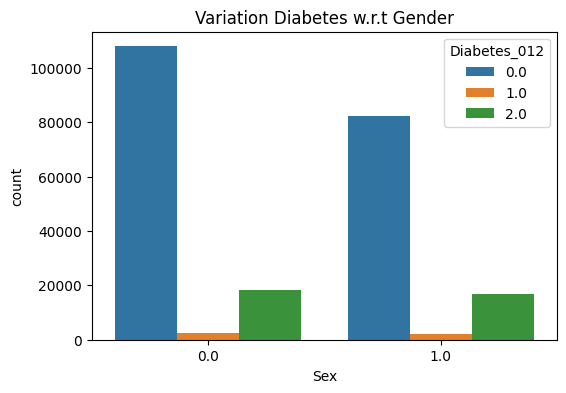

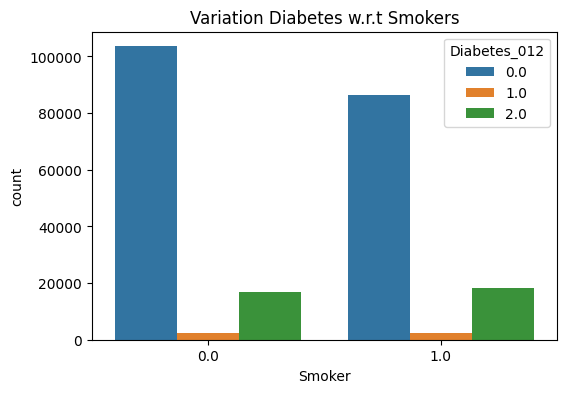

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='Sex', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t Gender')

plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='Smoker', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t Smokers')

Text(0.5, 1.0, 'Variation Diabetes w.r.t people with HighChol')

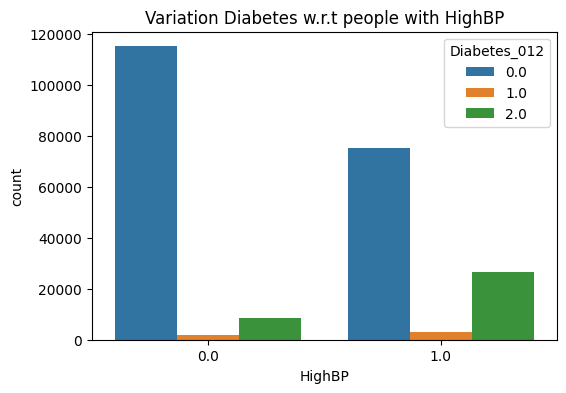

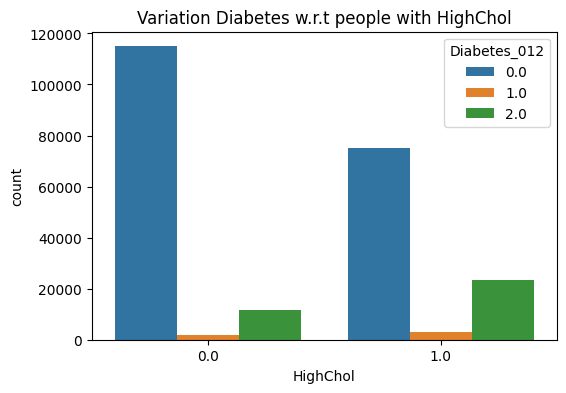

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='HighBP', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t people with HighBP')

plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='HighChol', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t people with HighChol')

Text(0.5, 1.0, 'Variation Diabetes w.r.t people with Heavy Alchohol Consumers')

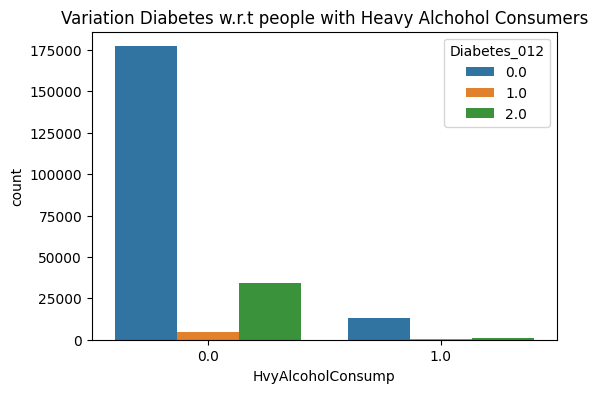

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='HvyAlcoholConsump', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t people with Heavy Alchohol Consumers')

# Understanding whether how much does categorical variables like ['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump'] are influencing Diabetes through Cho-Square Test(Statistical Test)

In [ ]:
def chiSquareTestFunction(inputData, targetFeature, predictorVariables):
  selectedPredictors=[]
  for predictor in predictorVariables:
    crossTableResults = pd.crosstab(index=inputData[targetFeature],columns=inputData[predictor])
    chisquareResult = chi2_contingency(crossTableResults)
    if(chisquareResult[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
  return selectedPredictors

In [ ]:
probableCategoricalPredictorVariables = ['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump']
chiSquareTestFunction(inputData=gabrielDataset_Actual_Copy, targetFeature='Diabetes_012', predictorVariables=probableCategoricalPredictorVariables)

Sex  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
HighChol  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
HighBP  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
Smoker  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
HvyAlcoholConsump  is correlated with the target-variable  Diabetes_012  with p-value:  0.0


['Sex', 'HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump']

# Selecting final predictors from Gabriel's Dataset

In [ ]:
selectedFeatures = ['Age','BMI','Gender','HighChol','HighBP','Smoker','HvyAlcoholConsump','Diabetes']

In [ ]:
gabrielDataset_Actual_Copy.rename(columns = {'Diabetes_012': 'Diabetes','Sex':'Gender'},inplace=True)
gabrielDataset_Actual_Copy = gabrielDataset_Actual_Copy[selectedFeatures]
gabrielDataset_Actual_Copy.head(15)

,Age,BMI,Gender,HighChol,HighBP,Smoker,HvyAlcoholConsump,Diabetes
0,9.0,40.0,0.0,1.0,1.0,1.0,0.0,0.0
1,7.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9.0,28.0,0.0,1.0,1.0,0.0,0.0,0.0
3,11.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11.0,24.0,0.0,1.0,1.0,0.0,0.0,0.0
5,10.0,25.0,1.0,1.0,1.0,1.0,0.0,0.0
6,9.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
7,11.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0
8,9.0,30.0,0.0,1.0,1.0,1.0,0.0,2.0
9,8.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_actual = gabrielDataset_Actual.copy()
df_actual.rename(columns = {'Diabetes_012': 'Diabetes','Sex':'Gender'},inplace=True)
df_actual = df_actual[selectedFeatures]
print(df_actual.describe())

                 Age            BMI         Gender       HighChol  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        8.032119      28.382364       0.440342       0.424121   
std         3.054220       6.608694       0.496429       0.494210   
min         1.000000      12.000000       0.000000       0.000000   
25%         6.000000      24.000000       0.000000       0.000000   
50%         8.000000      27.000000       0.000000       0.000000   
75%        10.000000      31.000000       1.000000       1.000000   
max        13.000000      98.000000       1.000000       1.000000   

              HighBP         Smoker  HvyAlcoholConsump       Diabetes  
count  253680.000000  253680.000000      253680.000000  253680.000000  
mean        0.429001       0.443169           0.056197       0.296921  
std         0.494934       0.496761           0.230302       0.698160  
min         0.000000       0.000000           0.000000       0.000000  
25%         0.0000

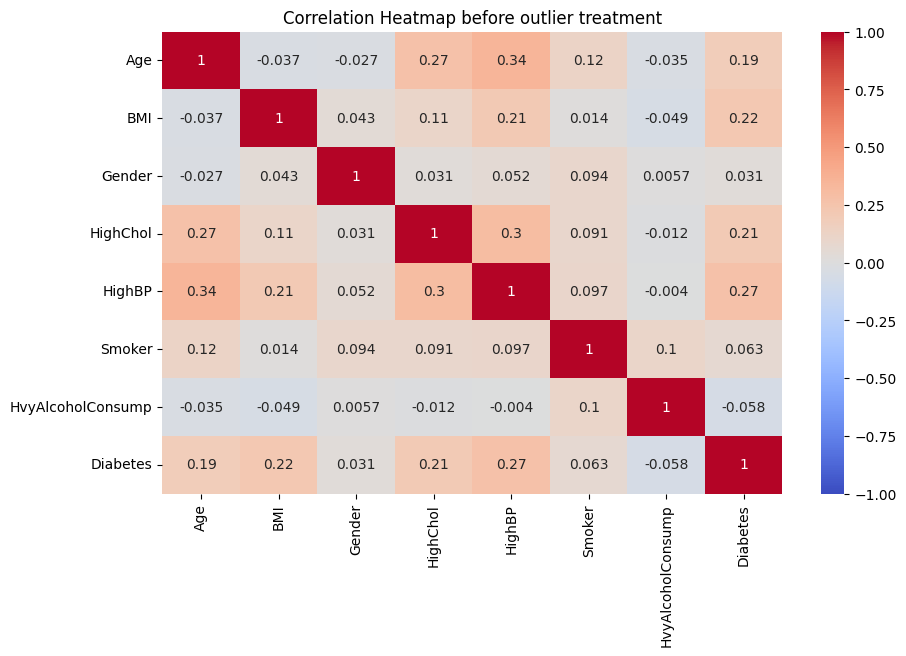

In [ ]:
corr_matrix = df_actual.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

## Treating BMI's outliers

In [ ]:
df_OutlierRemoval = gabrielDataset_Actual_Copy.copy()
df_MedianImputation = gabrielDataset_Actual_Copy.copy()
df_MeanImputation = gabrielDataset_Actual_Copy.copy()
df_ZeroImputation = gabrielDataset_Actual_Copy.copy()

(223094, 8)


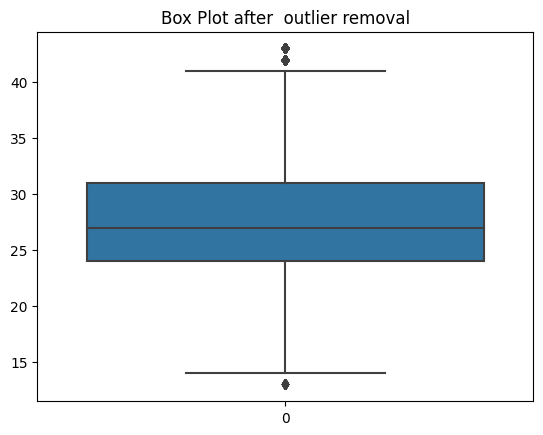

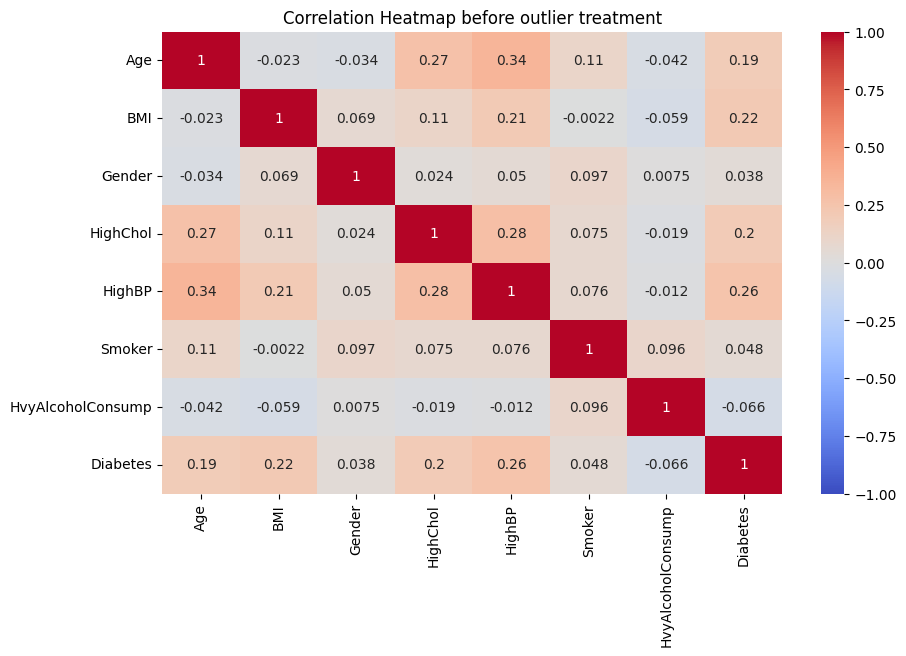

In [ ]:
# Outlier Removal
iqr = df_OutlierRemoval['BMI'].quantile(0.75) - df_OutlierRemoval['BMI'].quantile(0.25)

# Calculate the lower and upper bounds
lower_bound = df_OutlierRemoval['BMI'].quantile(0.25) - (1.5 * iqr)
upper_bound = df_OutlierRemoval['BMI'].quantile(0.75) + (1.5 * iqr)

# Drop the outliers
df_OutlierRemoval = df_OutlierRemoval[(df_OutlierRemoval['BMI'] > lower_bound) & (df_OutlierRemoval['BMI'] < upper_bound)]

print(df_OutlierRemoval.shape)

sns.boxplot (df_OutlierRemoval['BMI'])
plt.title("Box Plot after  outlier removal")
plt.show()

corr_matrix = df_OutlierRemoval.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

Total of 6687 records removed after outlier removal

(223094, 8)
24.0 31.0 7.0 13.5 41.5


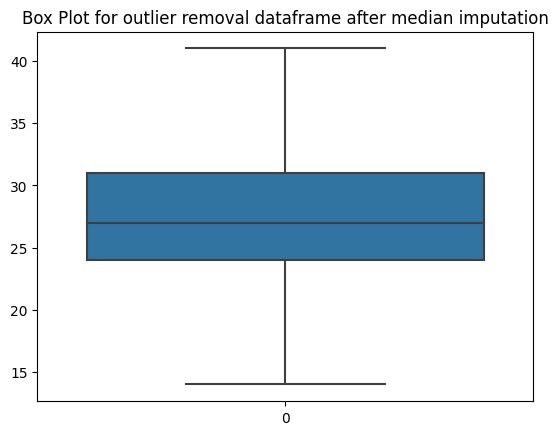

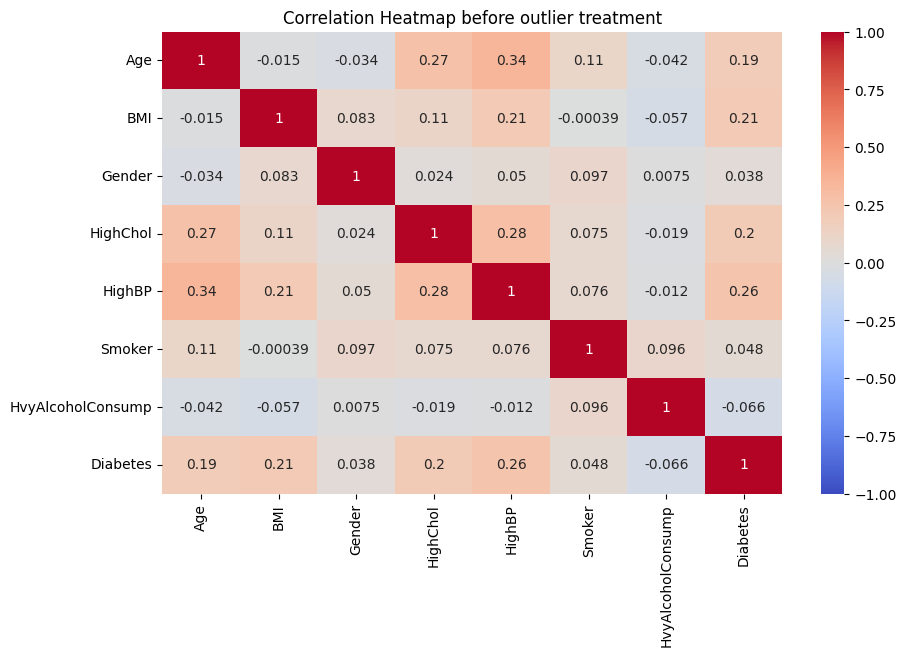

In [ ]:
# Median Imputation after removal of outliers
q1=0
q3=0
iqr=0
Lower_tail=0
Upper_tail=0
for i in df_OutlierRemoval['BMI']:
  q1 = df_OutlierRemoval['BMI'].quantile(0.25)
  q3 = df_OutlierRemoval['BMI'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  if i > Upper_tail or i < Lower_tail:
    df_OutlierRemoval['BMI'] = df_OutlierRemoval['BMI']. replace (i, np.median(df_OutlierRemoval['BMI']))

print(df_OutlierRemoval.shape)
print(q1,q3,iqr,Lower_tail,Upper_tail)

sns.boxplot (df_OutlierRemoval['BMI'])
plt.title("Box Plot for outlier removal dataframe after median imputation")
plt.show()

corr_matrix = df_OutlierRemoval.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

(229781, 8)
24.0 31.0 7.0 13.5 41.5


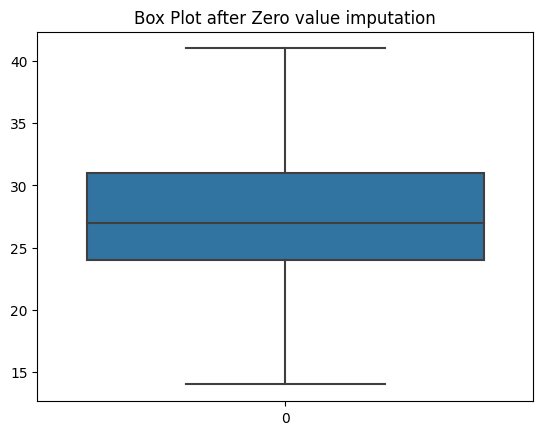

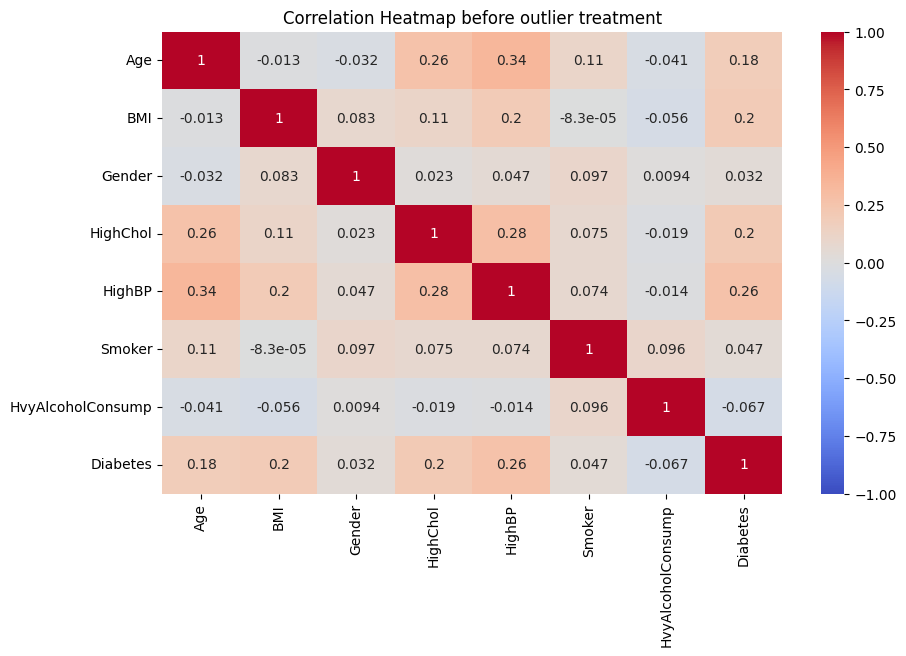

In [ ]:
# Median Imputation
q1=0
q3=0
iqr=0
Lower_tail=0
Upper_tail=0
for i in df_MedianImputation['BMI']:
  q1 = df_MedianImputation['BMI'].quantile(0.25)
  q3 = df_MedianImputation['BMI'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  if i > Upper_tail or i < Lower_tail:
    df_MedianImputation['BMI'] = df_MedianImputation['BMI']. replace (i, np.median(df_MedianImputation['BMI']))

print(df_MedianImputation.shape)
print(q1,q3,iqr,Lower_tail,Upper_tail)

sns.boxplot (df_MedianImputation['BMI'])
plt.title("Box Plot after Zero value imputation")
plt.show()

corr_matrix = df_MedianImputation.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

(229781, 8)
24.0 31.0 7.0 13.5 41.5


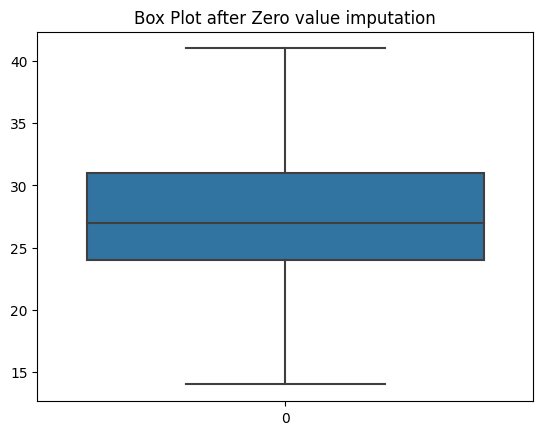

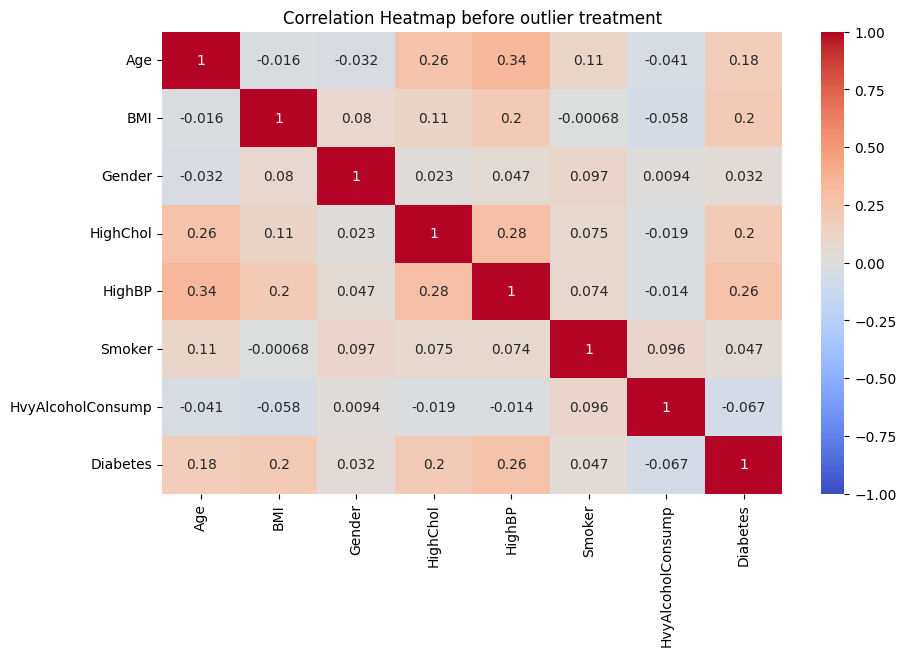

In [ ]:
# Mean Imputation
q1=0
q3=0
iqr=0
Lower_tail=0
Upper_tail=0
for i in df_MeanImputation['BMI']:
  q1 = df_MeanImputation['BMI'].quantile(0.25)
  q3 = df_MeanImputation['BMI'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  if i > Upper_tail or i < Lower_tail:
    df_MeanImputation['BMI'] = df_MeanImputation['BMI']. replace (i, np.mean(df_MeanImputation['BMI']))

print(df_MeanImputation.shape)
print(q1,q3,iqr,Lower_tail,Upper_tail)

sns.boxplot (df_MeanImputation['BMI'])
plt.title("Box Plot after Zero value imputation")
plt.show()

corr_matrix = df_MeanImputation.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

In [ ]:
df_OutlierRemoval.to_csv('FinalGabrielDataset.csv')

In [12]:
from google.colab import files
uploaded = files.upload()

Saving FinalGabrielDataset (2).csv to FinalGabrielDataset (2).csv


In [13]:
FinalGabrielDataset_Actual = pd.read_csv(io.BytesIO(uploaded['FinalGabrielDataset (2).csv']))

In [14]:
FinalGabrielDataset_Actual.head()

,Age,BMI,Gender,HighChol,HighBP,Smoker,HvyAlcoholConsump,Diabetes
0,9,40,0,1,1,1,0,0
1,7,25,0,0,0,1,0,0
2,9,28,0,1,1,0,0,0
3,11,27,0,0,1,0,0,0
4,11,24,0,1,1,0,0,0


Text(0.5, 1.0, 'Variation Diabetes')

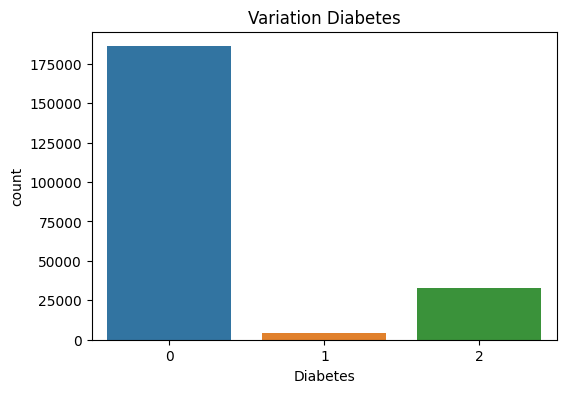

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=FinalGabrielDataset_Actual, x='Diabetes' )
plt.title('Variation Diabetes')

In [16]:
mask = FinalGabrielDataset_Actual['Diabetes'] == 1
FinalGabrielDataset_Actual = FinalGabrielDataset_Actual[~mask]

In [9]:
print(FinalGabrielDataset_Actual.info())
print(FinalGabrielDataset_Actual.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218672 entries, 0 to 223093
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         218672 non-null  int64  
 1   Age                218672 non-null  float64
 2   BMI                218672 non-null  float64
 3   Gender             218672 non-null  float64
 4   HighChol           218672 non-null  float64
 5   HighBP             218672 non-null  float64
 6   Smoker             218672 non-null  float64
 7   HvyAlcoholConsump  218672 non-null  float64
 8   Diabetes           218672 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 16.7 MB
None
(218672, 9)


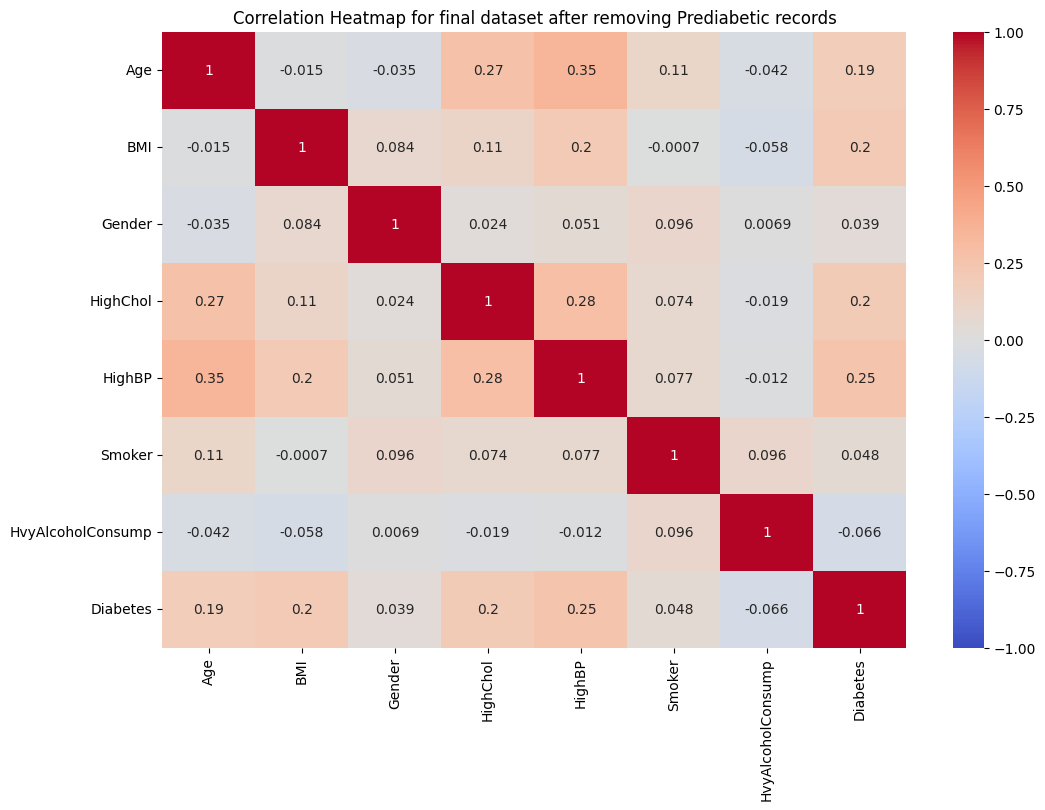

In [17]:
corr_matrix = FinalGabrielDataset_Actual.corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for final dataset after removing Prediabetic records')
plt.show()

In [19]:
finalSelectedFeatures = ['Age','BMI','HighChol','HighBP','Diabetes']

In [20]:
FinalGabrielDataset_Actual_Copy = FinalGabrielDataset_Actual.copy()
FinalGabrielDataset_Actual_Copy = FinalGabrielDataset_Actual_Copy[finalSelectedFeatures]
print(FinalGabrielDataset_Actual_Copy.shape)
print(FinalGabrielDataset_Actual_Copy.info())
print(FinalGabrielDataset_Actual_Copy.describe())
print(FinalGabrielDataset_Actual_Copy.head())

(218672, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 218672 entries, 0 to 223093
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Age       218672 non-null  int64
 1   BMI       218672 non-null  int64
 2   HighChol  218672 non-null  int64
 3   HighBP    218672 non-null  int64
 4   Diabetes  218672 non-null  int64
dtypes: int64(5)
memory usage: 10.0 MB
None
                 Age            BMI       HighChol         HighBP  \
count  218672.000000  218672.000000  218672.000000  218672.000000   
mean        8.092714      27.751989       0.436759       0.444968   
std         3.107289       5.014038       0.495986       0.496963   
min         1.000000      14.000000       0.000000       0.000000   
25%         6.000000      24.000000       0.000000       0.000000   
50%         8.000000      27.000000       0.000000       0.000000   
75%        10.000000      31.000000       1.000000       1.000000   
max        13.00

In [21]:
FinalGabrielDataset_Actual_Copy['Diabetes'] = FinalGabrielDataset_Actual_Copy['Diabetes'].replace(2,1)
FinalGabrielDataset_Actual_Copy.nunique()

Age         13
BMI         28
HighChol     2
HighBP       2
Diabetes     2
dtype: int64

In [22]:
FinalGabrielDataset_Actual_Copy.to_csv('FinalGabrielDataset.csv')